In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Unknown Dataset', index_col= 0)

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [6]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [7]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [8]:
from sklearn.model_selection import train_test_split
x = df_feat
y = df['TARGET CLASS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.4)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors= 1)

In [11]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
pred = knn.predict(x_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       198
           1       0.91      0.92      0.91       202

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [15]:
confusion_matrix(y_test, pred)

array([[179,  19],
       [ 16, 186]], dtype=int64)

In [16]:
error_rate = []
for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    pred_i = knn.predict(x_test)

    error_rate.append(np.mean(pred_i != y_test))



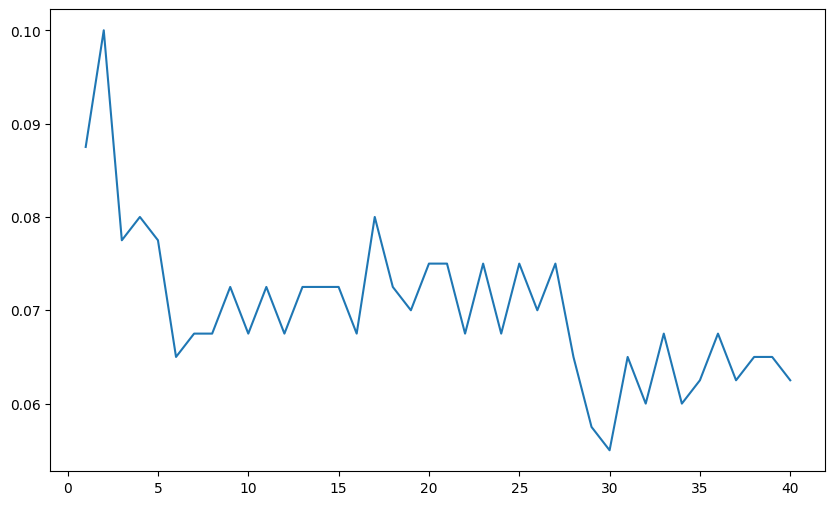

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41), error_rate)

In [18]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       198
           1       0.93      0.94      0.93       202

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [19]:
confusion_matrix(y_test, pred)

array([[183,  15],
       [ 12, 190]], dtype=int64)